# Contents
1. Delaminating cell: Cell morphology over time
2. Mother cells categorized by daughter fates
3. Analysis of growth rate differences (didn't find much)

In [2]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sb

from os import path

dirnames = {'R1':'/Users/xies/OneDrive - Stanford/Skin/Mesa et al/W-R1/',
           'R2':'/Users/xies/OneDrive - Stanford/Skin/Mesa et al/W-R2/'}
all_df = []
for name,dirname in dirnames.items():
    _df = pd.read_pickle(path.join(dirname,'Mastodon/single_timepoints_dynamics_aggregated_lookback_history.pkl'))
    _df = _df.drop_duplicates().sort_index().reset_index()
    _df['TrackID'] = name + '_' + _df['TrackID'].astype(str)
    _df = _df.set_index(['Frame','TrackID'])
    _df['Region'] = name
    all_df.append(_df)

all_df = pd.concat(all_df)
all_tracks = {trackID:t for trackID,t in all_df.reset_index().groupby('TrackID')}
tracks = list(all_tracks.values())


## 1. Delaminating cell  <a id='delam'></a>

Text(0, 0.5, 'Count')

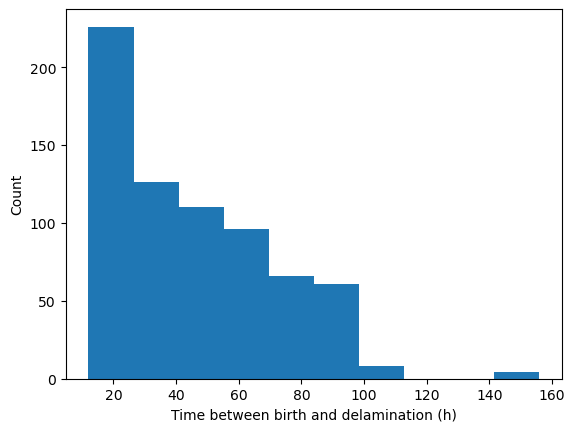

In [24]:
delaminations = pd.DataFrame()
delaminations['Time to differentiation'] = np.array([-t['Time to differentiation'].min() for t in tracks]).squeeze()
plt.hist(delaminations['Time to differentiation'])
plt.xlabel('Time between birth and delamination (h)')
plt.ylabel('Count')


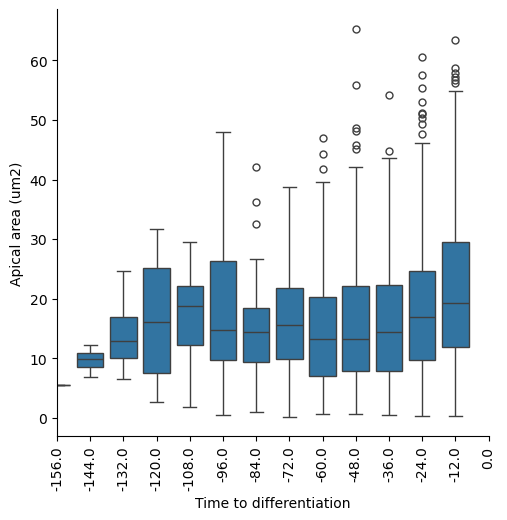

In [26]:
sb.catplot(all_df.xs('Measurement',level=1,axis=1),x='Time to differentiation',y='Apical area',kind='box')
plt.xlim([0,13])
plt.ylabel('Apical area (um2)');
plt.gca().tick_params(axis='x', labelrotation=90)

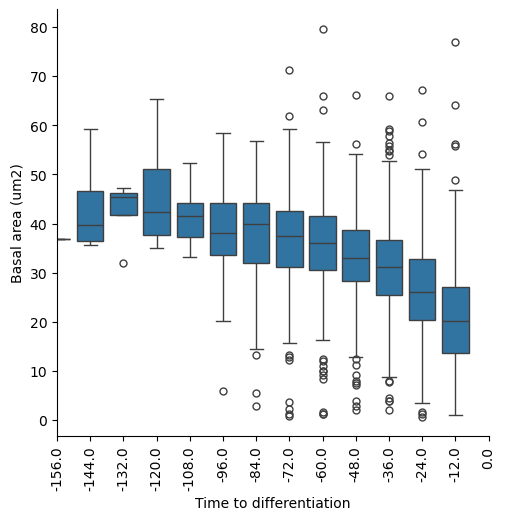

In [27]:
sb.catplot(all_df.xs('Measurement',level=1,axis=1),x='Time to differentiation',y='Basal area',kind='box')
plt.xlim([0,13])
plt.ylabel('Basal area (um2)');
plt.gca().tick_params(axis='x', labelrotation=90)

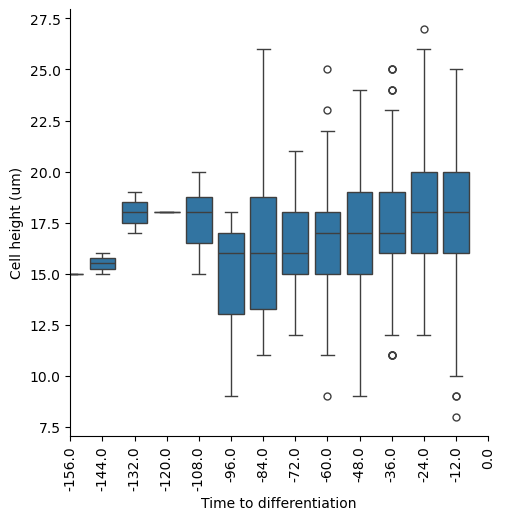

In [91]:
sb.catplot(all_df,x='Time to differentiation',y='Height',kind='box')
plt.xlim([0,13])
plt.ylabel('Cell height (um)');
plt.gca().tick_params(axis='x', labelrotation=90)

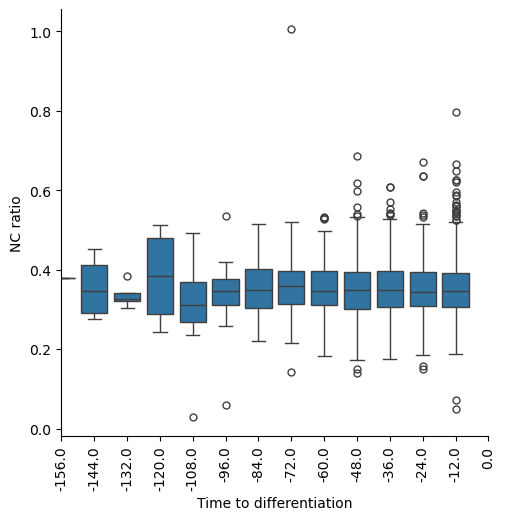

In [5]:
sb.catplot(all_df.xs('Measurement',level=1,axis=1),x='Time to differentiation',y='NC ratio',kind='box')
plt.xlim([0,13])
plt.gca().tick_params(axis='x', labelrotation=90)

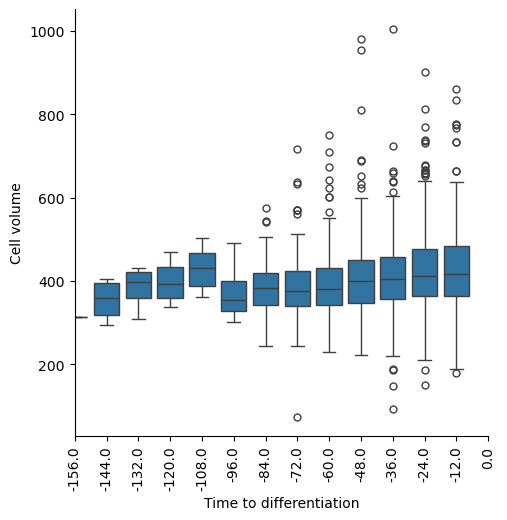

In [6]:
sb.catplot(all_df.xs('Measurement',level=1,axis=1),x='Time to differentiation',y='Cell volume',kind='box')
plt.xlim([0,13])
plt.gca().tick_params(axis='x', labelrotation=90)

### 1.2 Cell growth during delamination - diff. cells grow slower

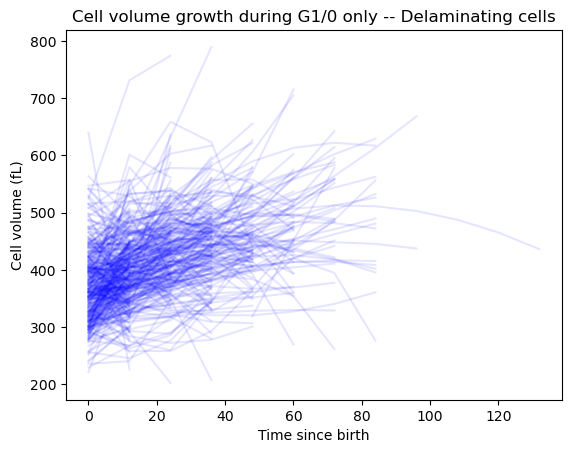

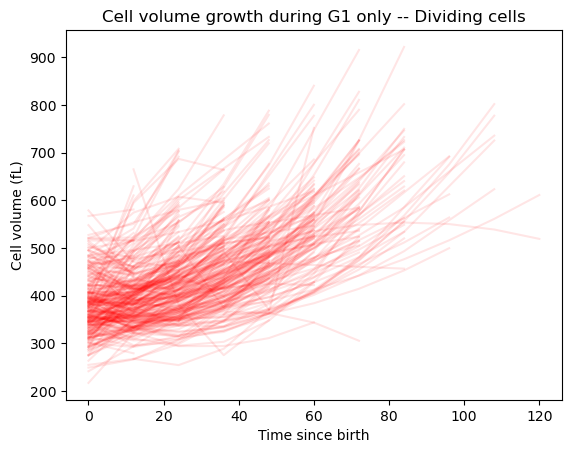

<Figure size 640x480 with 0 Axes>

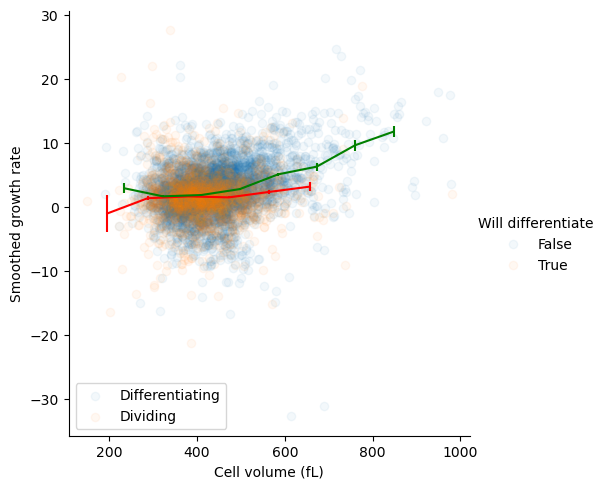

In [50]:
from basicUtils import plot_bin_means, nonan_pairs

y2plot = 'Cell volume smoothed'

for t in tracks:
    if t.iloc[0]['Will differentiate','Meta']:
        t = t[t['Cell cycle phase','Meta'] == 'G1']
        plt.plot(t['Age'],t[y2plot],color='b',alpha=0.1)
plt.xlabel('Time since birth')
plt.ylabel('Cell volume (fL)')
plt.title('Cell volume growth during G1/0 only -- Delaminating cells')

plt.figure()
for t in tracks:
    if t.iloc[0]['Will divide','Meta']:
        t = t[t['Cell cycle phase','Meta'] == 'G1']
        plt.plot(t['Age'],t[y2plot],color='r',alpha=0.1)
plt.xlabel('Time since birth')
plt.ylabel('Cell volume (fL)')
plt.title('Cell volume growth during G1 only -- Dividing cells')

plt.figure()
sb.lmplot(all_df[all_df['Cell cycle phase','Meta'] == 'G1'].droplevel(axis=1,level=1),
          x='Cell volume',
          y='Cell volume smoothed growth rate',
          hue='Will differentiate', scatter_kws={'alpha':0.05},fit_reg=False)



g1 = all_df[all_df['Cell cycle phase','Meta'] == 'G1'].droplevel(axis=1,level=1)
X,Y = nonan_pairs(g1[g1['Will differentiate']]['Cell volume'],g1[g1['Will differentiate']]['Cell volume smoothed growth rate'])
plot_bin_means(X,Y,bin_edges=10,color='r',error='sem')
X,Y = nonan_pairs(g1[~g1['Will differentiate']]['Cell volume'],g1[~g1['Will differentiate']]['Cell volume smoothed growth rate'])
plot_bin_means(X,Y,bin_edges=10,color='g',error='sem',mean='mean')

plt.xlabel('Cell volume (fL)')
plt.ylabel('Smoothed growth rate')
plt.legend(['Differentiating','Dividing'])

Text(0.5, 1.0, 'Cell volume growth during G1 only -- Dividing cells')

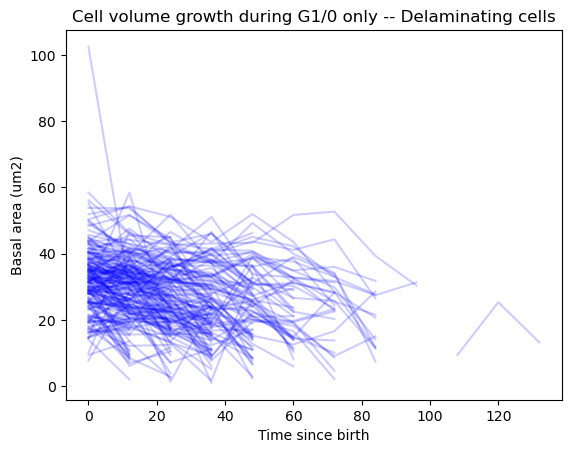

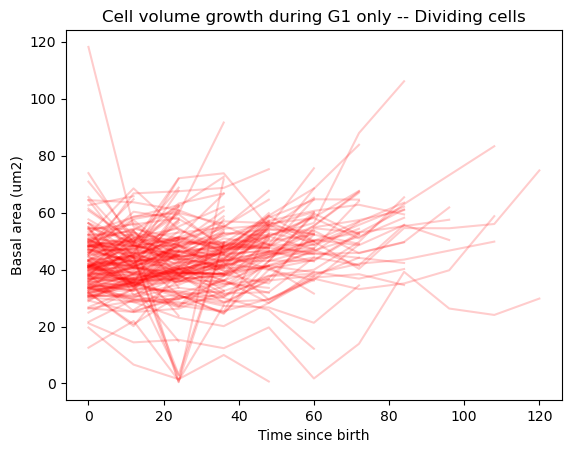

In [98]:
y2plot = 'Basal area'

for t in tracks:
    if t.iloc[0]['Will differentiate']:
        t = t[t['Cell cycle phase'] == 'G1']
        plt.plot(t['Age'],t[y2plot],color='b',alpha=0.2)
plt.xlabel('Time since birth')
plt.ylabel('Basal area (um2)')
plt.title('Cell volume growth during G1/0 only -- Delaminating cells')
plt.ylim([0,100])

plt.figure()
for t in tracks:
    if t.iloc[0]['Will divide']:
        t = t[t['Cell cycle phase'] == 'G1']
        plt.plot(t['Age'],t[y2plot],color='r',alpha=0.2)
plt.xlabel('Time since birth')
plt.ylabel('Basal area (um2)')
plt.title('Cell volume growth during G1 only -- Dividing cells')

### Try a few different other smoothinbg strategies to get rid of boundary artifact?

In [7]:
%load_ext autoreload
%autoreload 2

from measurements import get_interpolated_curve

In [55]:
from measurements import get_interpolated_curve

oldY = []
T = []
Y = []
DY = []
for t in tracks:
    new_t = get_interpolated_curve(t.droplevel(axis=1,level=1))
    oldY.append(t['Cell volume'].values)
    T.append((new_t['Frame']-new_t.iloc[0]['Frame'])*12)
    Y.append(new_t['Cell volume smoothed'])
    DY.append(new_t['Cell volume smoothed growth rate'])


1

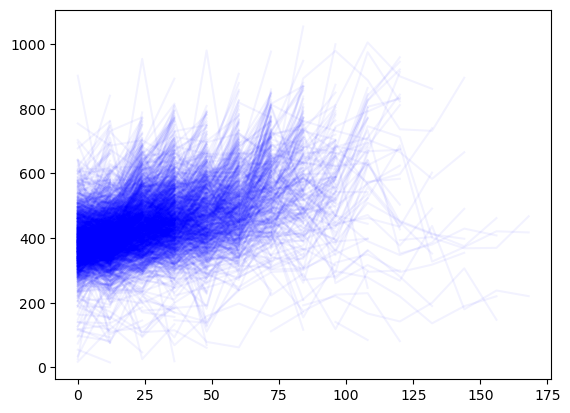

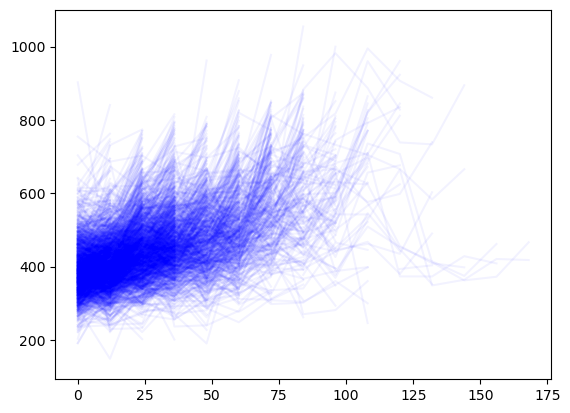

In [56]:


for t,y,dy in zip(T,oldY,Y):
    plt.figure(1)
    plt.plot(t,y,'b',alpha=0.05)

    plt.figure(2)
    plt.plot(t,dy,'b',alpha=0.05)
    

## 2. Mother cell <a id="mother"></a>

2323

In [27]:
divisions = pd.DataFrame()
divisions['Num daughter differentiated'] = np.array([t['Num daughter differentiated','Meta'].iloc[0] for t in tracks])

for i,t in enumerate(tracks):
    divisions.loc[i,'Cell volume exponential growth rate'] = t.iloc[0]['Cell volume exponential growth rate','Measurement']
    if t.iloc[0]['Born','Meta']:
        divisions.loc[i,'Cell cycle time'] = len(t) * 12
        divisions.loc[i,'Cell volume at birth'] = t.iloc[0]['Cell volume smoothed','Measurement']
        divisions.loc[i,'Cell volume at division'] = t.iloc[-1]['Cell volume smoothed','Measurement']
    else:
        divisions.loc[i,'Cell cycle time'] = np.nan
        divisions.loc[i,'Cell volume at birth'] = np.nan
        divisions.loc[i,'Cell volume at division'] = t.iloc[-1]['Cell volume smoothed','Measurement']
        

In [30]:
divisions.groupby('Num daughter differentiated').count()

,Cell volume exponential growth rate,Cell cycle time,Cell volume at birth,Cell volume at division
Num daughter differentiated,,,,
0.0,40,11,11,72
1.0,65,12,11,138
2.0,52,37,36,97


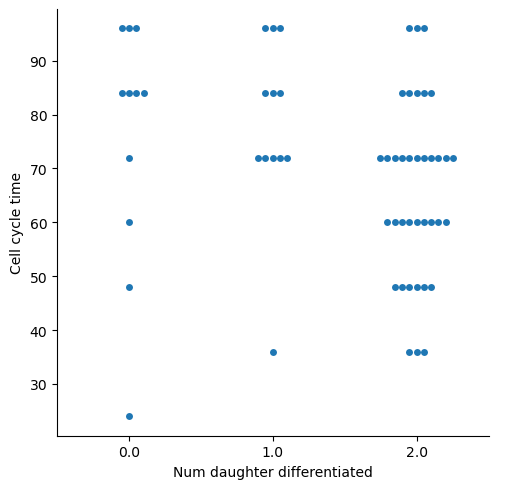

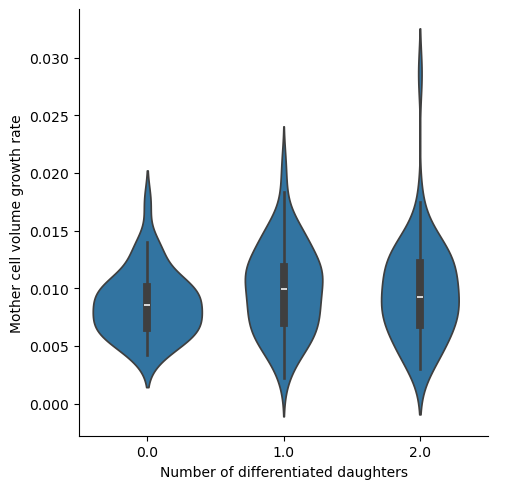

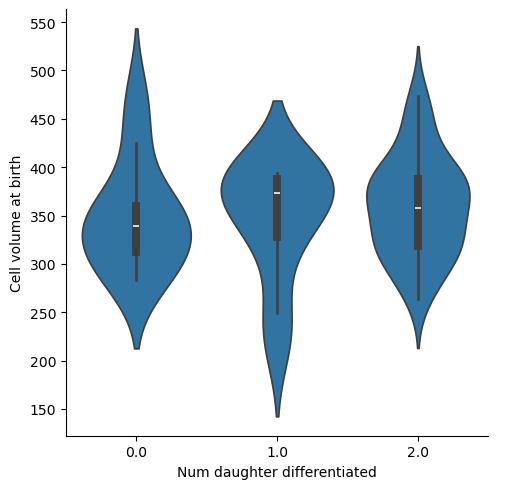

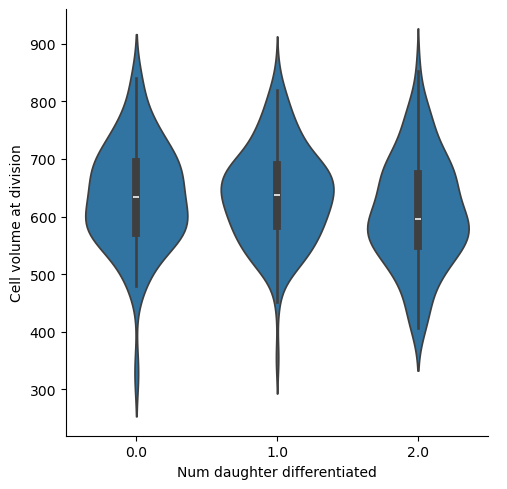

In [29]:
sb.catplot(divisions,x='Num daughter differentiated',y='Cell cycle time',kind='swarm')
sb.catplot(divisions,x='Num daughter differentiated',y='Cell volume exponential growth rate',kind='violin')
plt.xlabel('Number of differentiated daughters')
plt.ylabel('Mother cell volume growth rate')
sb.catplot(divisions,x='Num daughter differentiated',y='Cell volume at birth',kind='violin')
sb.catplot(divisions,x='Num daughter differentiated',y='Cell volume at division',kind='violin')

### 2.2 Mother cell time series

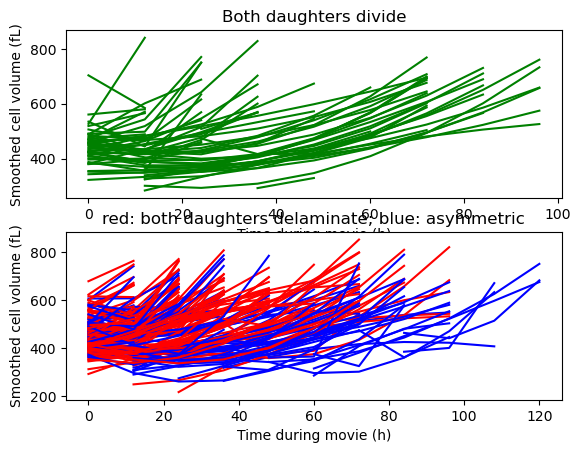

In [33]:
colors = {1:'r',2:'b',0:'g',np.nan:'w'}

for t in tracks:

    fate = t.iloc[0]['Num daughter differentiated','Meta']
    if fate == 0:
        plt.subplot(2,1,1)
        plt.title('Both daughters divide')
    if fate > 0:
        plt.subplot(2,1,2)
        plt.title('red: both daughters delaminate; blue: asymmetric')
    if np.isnan(fate):
        continue

    plt.plot(t.Time,t['Cell volume smoothed'],color=colors[fate])
    plt.xlabel('Time during movie (h)'); plt.ylabel('Smoothed cell volume (fL)')
    

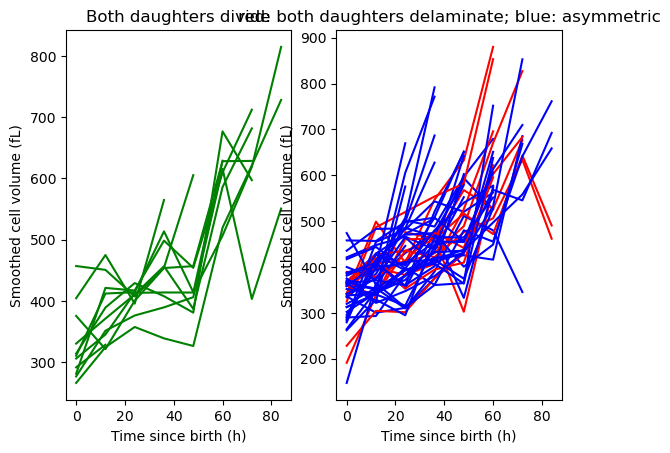

In [37]:
colors = {1:'r',2:'b',0:'g',np.nan:'w'}

for t in tracks:

    fate = t.iloc[0]['Num daughter differentiated','Meta']
    if fate == 0:
        plt.subplot(1,2,1)
        plt.title('Both daughters divide')
    if fate > 0:
        plt.subplot(1,2,2)
        plt.title('red: both daughters delaminate; blue: asymmetric')
    if np.isnan(fate):
        continue

    plt.plot(t['Age'],t['Cell volume'],color=colors[fate])
    plt.xlabel('Time since birth (h)'); plt.ylabel('Smoothed cell volume (fL)')
    

Name,Frame,TrackID,Nuclear volume,Nuclear solidity,Nuclear bbox top,Nuclear bbox bottom,Z,Y,X,Cell volume,...,Median adjac Y-pixels at 1 frame prior,Min adjac nuc_shcoeffs_L2M2C at 1 frame prior,Min adjac Mean curvature at 1 frame prior,Std adjac Nuclear volume exponential growth rate at 1 frame prior,Max adjac Nuclear solidity at 1 frame prior,Num neighbor division 1 frame prior,Num neighbor delamination 1 frame prior,Num daughter differentiated,At least one daughter differentiated,Both daughters differentiated
Metadata,,,Measurement,Measurement,Measurement,Measurement,Measurement,Measurement,Measurement,Measurement,...,Measurement,Measurement,Measurement,Measurement,Measurement,Measurement,Measurement,Meta,Meta,Meta
7635,14,1315,141.625,0.787626,49.0,60.0,53.977493,5.992056,5.218005,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Growth rate differences

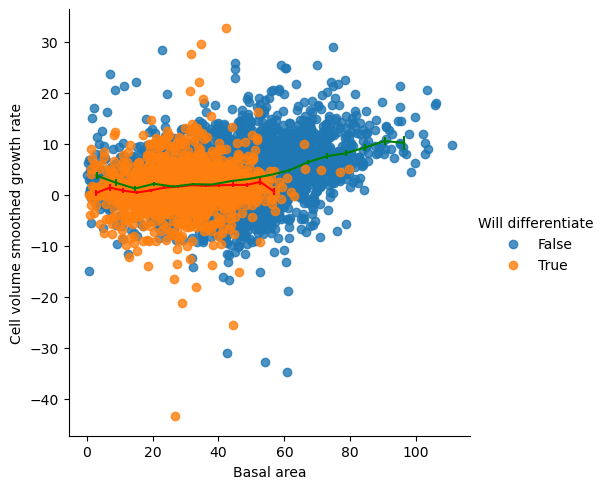

In [45]:
from basicUtils import plot_bin_means
x = 'Basal area'
y = 'Cell volume smoothed growth rate'
sb.lmplot(all_df.droplevel(axis=1,level=1),x=x,y=y,hue='Will differentiate',fit_reg=False,)
_df = all_df[all_df['Will differentiate','Meta']]
_ = plot_bin_means(_df[x].values,_df[y].values,bin_edges=20,color='r')
_df = all_df[~all_df['Will differentiate','Meta']]
_ = plot_bin_means(_df[x].values,_df[y].values,bin_edges=20,color='g')

ValueError: cannot join with no overlapping index names

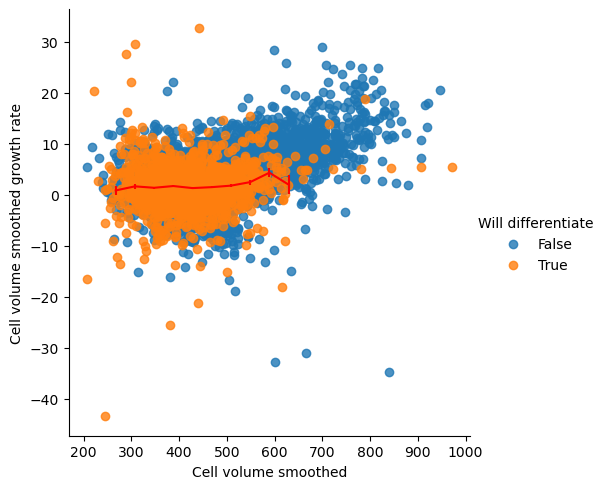

In [46]:
x = 'Cell volume smoothed'
y = 'Cell volume smoothed growth rate'
sb.lmplot(all_df.droplevel(axis=1,level=1),x=x,y=y,hue='Will differentiate',fit_reg=False,)
_df = all_df[all_df['Will differentiate','Meta']]
_ = plot_bin_means(_df[x].values,_df[y].values,bin_edges=20,color='r')
_df = all_df[(~all_df['Will differentiate','Meta']) & (all_df['Cell cycle phase'] == 'G1')]
_ = plot_bin_means(_df[x].values,_df[y].values,bin_edges=20,color='g')

In [41]:
x = 'Apical area'
y = 'Cell volume smoothed growth rate'
sb.lmplot(all_df,x=x,y=y,hue='Will differentiate',fit_reg=False,)
_df = all_df[all_df['Will differentiate','Meta']]
_ = plot_bin_means(_df[x].values,_df[y].values,bin_edges=20,color='r')
_df = all_df[(~all_df['Will differentiate']) & (all_df['Cell cycle phase'] == 'G1')]
_ = plot_bin_means(_df[x].values,_df[y].values,bin_edges=20,color='g')

ValueError: Data must be 1-dimensional, got ndarray of shape (15087, 1) instead

In [40]:
x = 'Height'
y = 'Cell volume smoothed growth rate'
sb.lmplot(all_df,x=x,y=y,hue='Will differentiate',fit_reg=False,)
_df = all_df[all_df['Will differentiate']]
_ = plot_bin_means(_df[x].values,_df[y].values,bin_edges=20,color='r')
_df = all_df[(~all_df['Will differentiate']) & (all_df['Cell cycle phase'] == 'G1')]
_ = plot_bin_means(_df[x].values,_df[y].values,bin_edges=20,color='g')

KeyError: "['Height'] not in index"

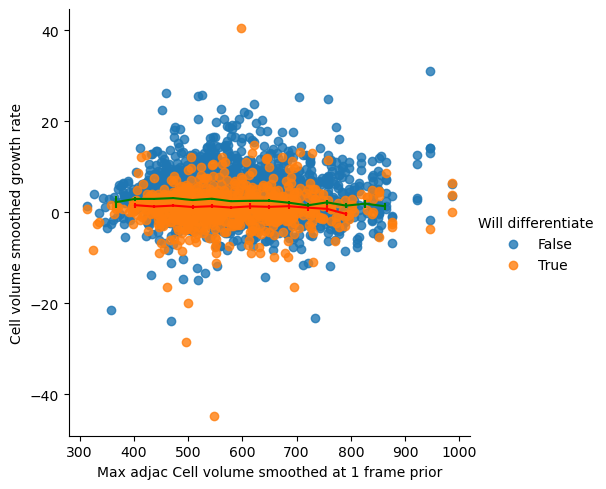

In [143]:
x = 'Max adjac Cell volume smoothed at 1 frame prior'
y = 'Cell volume smoothed growth rate'
sb.lmplot(all_df,x=x,y=y,hue='Will differentiate',fit_reg=False,)
_df = all_df[all_df['Will differentiate']]
_ = plot_bin_means(_df[x].astype(float),_df[y].astype(float),bin_edges=20,color='r')
_df = all_df[(~all_df['Will differentiate']) & (all_df['Cell cycle phase'] == 'G1')]
_ = plot_bin_means(_df[x].astype(float),_df[y].astype(float),bin_edges=20,color='g')


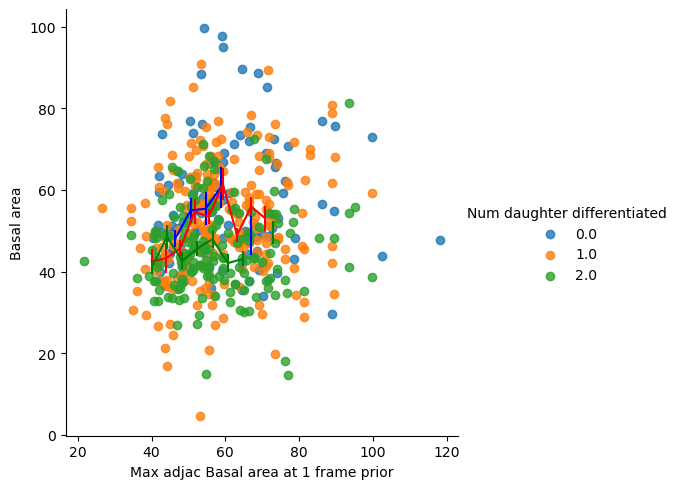

In [166]:
x = 'Max adjac Basal area at 1 frame prior'
y = 'Basal area'

sb.lmplot(all_df,x=x,y=y,hue='Num daughter differentiated',fit_reg=False,)
_df = all_df[all_df['Num daughter differentiated'] == 0]
_ = plot_bin_means(_df[x].astype(float),_df[y].astype(float),bin_edges=20,color='b')

_df = all_df[all_df['Num daughter differentiated'] == 1]
_ = plot_bin_means(_df[x].astype(float),_df[y].astype(float),bin_edges=20,color='r',minimum_n=10)

_df = all_df[all_df['Num daughter differentiated'] == 2]
_ = plot_bin_means(_df[x].astype(float),_df[y].astype(float),bin_edges=20,color='g')
